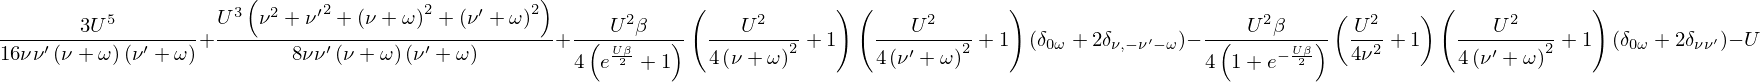

In [1]:
import sympy, numpy
from sympy.abc import x, theta
from sympy import init_printing

init_printing()

s_nu = sympy.Symbol("\\nu")
s_nu_p = sympy.Symbol("{\\nu^\\prime}")
s_omega = sympy.Symbol("{\\omega}")
s_U = sympy.Symbol("U")
s_beta = sympy.Symbol("{\\beta}")

s1 = s_nu + s_omega
s2 = s_nu_p + s_omega
s3 = s_nu * s_nu_p * s1 * s2

# Implementation of Eq.(31)
Fud_1 = -s_U + sympy.Rational(1,8) * (s_U**3) * (s_nu**2 + s1**2 + s2**2 + s_nu_p**2)/s3
Fud_2 = sympy.Rational(3,16)* (s_U**5)/s3 
Fud_3 = s_beta * ((s_U**2)/4) * (1/(1+sympy.exp(s_beta*s_U/2))) * (2*sympy.KroneckerDelta(s_nu, -s2) + sympy.KroneckerDelta(s_omega,0)) * (1 + s_U**2/(4*s1**2)) * (1 + s_U**2/(4*s2**2))
Fud_4 = -s_beta * ((s_U**2)/4) * (1/(1+sympy.exp(-s_beta*s_U/2))) * (2*sympy.KroneckerDelta(s_nu, s_nu_p) + sympy.KroneckerDelta(s_omega,0)) * (1 + s_U**2/(4*s_nu**2)) * (1 + s_U**2/(4*s2**2))

Fud = Fud_1 + Fud_2 + Fud_3 + Fud_4
Fud

In [2]:
beta = 5.0
U = 2.0

In [3]:
# Substitute \nu = 1, \nu^\prime=1, \omega=1 into the analytic expression of Eq.(31), where integers much be interpreted as
# fermionic or bosonic Matsubara frequencies.
n, n_p, m = 1, 1, 1
Fud.subs([(s_nu, (2*n+1)*numpy.pi/beta), (s_nu_p,(2*n_p+1)*numpy.pi/beta), (s_omega,(2*m)*numpy.pi/beta), (s_U,2), (s_beta,5)]).evalf()

In [4]:
import numpy
import scipy
import sys

def delta(i, j):
    if i==j:
        return 1
    else:
        return 0

# Numerical implementation of Eqs.(30) [Fuu] and (31) [Fud]
def F_ph(n, np, m):
    nu = (2*n+1)*numpy.pi/beta
    nu_p = (2*np+1)*numpy.pi/beta
    omega = 2*m*numpy.pi/beta
    
    r1 = nu+omega
    r2 = nu_p+omega
    tmp = 1/(nu * r1 * r2 * nu_p)
    
    Fuu = -0.25*beta*(U**2)*(delta(n,np)-delta(m,0))*(1+0.25*(U/nu)**2)*(1+0.25*(U/r2)**2)
    
    t1 = 0.125*(U**3)*(nu**2+r1**2+r2**2+nu_p**2)*tmp
    t2 = (3.0/16.0) * (U**5) * tmp
    t3 = beta * 0.25 * (U**2) * (1/(1+numpy.exp(0.5*beta*U))) * (2*delta(nu,-nu_p-m)+delta(m,0)) * (1+0.25*(U/r1)**2) * (1+0.25*(U/r2)**2)
    t4 = - beta * 0.25 * (U**2) * (1/(1+numpy.exp(-0.5*beta*U))) * (2*delta(nu, nu_p)+delta(m,0)) * (1+0.25*(U/nu)**2) * (1+0.25*(U/r2)**2)
    
    Fud = -U + t1 + t2 + t3 + t4
    
    return Fuu, Fud

# Single-particle Green's function: poles at omega = +/- U/2
def G1(n):
    iwn = 1J * (2*n+1)*numpy.pi/beta
    
    return 0.5/(iwn - U/2) + 0.5/(iwn + U/2)

# The second term of the right hand side of Eq.(9)
def G2_conn_ph(n, np, m):
    Fuu, Fud = F_ph(n, np, m)
    leggs = - G1(n) * G1(np) * G1(n + m) * G1(np + m)
    return leggs*Fuu, leggs*Fud

print(F_ph(1,1,1))
print(G2_conn_ph(1,1,1))

(-7.056427666781439, -15.081762560490278)
((0.10103064440229036+0j), (0.21593365115633148+0j))


No handles with labels found to put in legend.


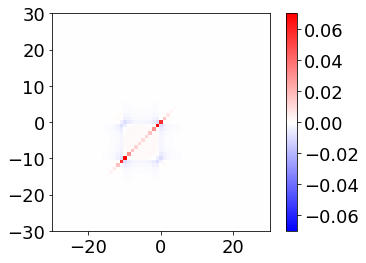

In [5]:
import matplotlib.pylab as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

N = 30
x = numpy.linspace(-N, N, 2*N+1)
z = numpy.zeros((2*N+1, 2*N+1), dtype=float)
m = 10

for i in range(2*N+1):
    for j in range(2*N+1):
        n = x[i]
        np = x[j]
        G2_conn_uu_ph, G2_conn_ud_ph = G2_conn_ph(n, np, m)
        # Eq. (17): density channel
        z[i,j] = (G2_conn_uu_ph + G2_conn_ud_ph).real

vrange = numpy.amax(numpy.abs(z))
plt.imshow(z.T, origin="lower", extent=(numpy.amin(x), numpy.amax(x), numpy.amin(x), numpy.amax(x)), cmap=cm.bwr, vmin=-vrange, vmax=vrange)
plt.colorbar()

plt.legend(loc='best',shadow=True,frameon=False)